# CCB - Cementos Argos SA

In [1]:
from data_functions import *

I will be giving investment recommendations for the company CCB in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [2]:
CCB = pd.read_csv('./Data/Colombia - Cementos Argos SA (CCB).csv')

In [3]:
CCB

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021","5,150.00","5,100.00","5,170.00","5,100.00",212.44K,0.98%
1,"Mar 30, 2021","5,100.00","5,010.00","5,100.00","5,010.00",583.70K,1.09%
2,"Mar 29, 2021","5,045.00","5,020.00","5,045.00","5,015.00",117.54K,0.50%
3,"Mar 26, 2021","5,020.00","5,085.00","5,085.00","4,980.00",203.46K,-0.20%
4,"Mar 25, 2021","5,030.00","5,035.00","5,045.00","4,950.00",317.06K,0.10%
...,...,...,...,...,...,...,...
299,"Jan 08, 2020","6,880.00","6,940.00","6,950.00","6,880.00",84.93K,-1.01%
300,"Jan 07, 2020","6,950.00","6,950.00","6,950.00","6,850.00",168.71K,-0.71%
301,"Jan 03, 2020","7,000.00","7,040.00","7,100.00","6,960.00",470.77K,-1.69%
302,"Jan 02, 2020","7,120.00","7,300.00","7,300.00","7,120.00",138.96K,-2.47%


In [4]:
CCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      304 non-null    object
 1   Price     304 non-null    object
 2   Open      304 non-null    object
 3   High      304 non-null    object
 4   Low       304 non-null    object
 5   Vol.      303 non-null    object
 6   Change %  303 non-null    object
dtypes: object(7)
memory usage: 16.8+ KB


In [5]:
## drop last row because it doesn't contain relevant information

CCB.drop(303, inplace=True)

In [6]:
## change date column to datetime

CCB['Date'] = pd.to_datetime(CCB['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

CCB['Price'] = CCB['Price'].str.replace(',', '').astype(float)
CCB['Open'] = CCB['Open'].str.replace(',', '').astype(float)
CCB['High'] = CCB['High'].str.replace(',', '').astype(float)
CCB['Low'] = CCB['Low'].str.replace(',', '').astype(float)

In [8]:
CCB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      303 non-null    datetime64[ns]
 1   Price     303 non-null    float64       
 2   Open      303 non-null    float64       
 3   High      303 non-null    float64       
 4   Low       303 non-null    float64       
 5   Vol.      303 non-null    object        
 6   Change %  303 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.9+ KB


In [9]:
CCB.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
CCB

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,7120.0,7300.0,7300.0,7120.0,138.96K,-2.47%
1,2020-01-03,7000.0,7040.0,7100.0,6960.0,470.77K,-1.69%
2,2020-01-07,6950.0,6950.0,6950.0,6850.0,168.71K,-0.71%
3,2020-01-08,6880.0,6940.0,6950.0,6880.0,84.93K,-1.01%
4,2020-01-09,6810.0,6880.0,6890.0,6800.0,262.89K,-1.02%
...,...,...,...,...,...,...,...
298,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06K,0.10%
299,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46K,-0.20%
300,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54K,0.50%
301,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70K,1.09%


In [10]:
## find rows for 2021 data

CCB.loc[CCB['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
242,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99K,-1.29%
243,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03K,-3.93%
244,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98K,0.09%
245,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18K,-2.81%
246,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80K,2.98%
...,...,...,...,...,...,...,...
298,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06K,0.10%
299,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46K,-0.20%
300,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54K,0.50%
301,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70K,1.09%


Because the length of 2021 data for CCB is 61, I will be putting the removing the first date of 2021 from the testing data and putting it into the training data. The reason for this is because we need a test dataset that is divisible by 5 for the weekly and monthly test data, so that we have a uniform shape in the test data set.

In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = CCB[['Date', 'Price']][:243]
testing_data = CCB[['Date', 'Price']][243:]

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(CCB[['Price']])
scaled_train_data = scaled_data[:243]

# Daily

In [13]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(CCB, testing_data, scaler, 14)

In [14]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [15]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [16]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.19904853403568268
Epoch  1 MSE:  0.0965656042098999
Epoch  2 MSE:  0.04043159261345863
Epoch  3 MSE:  0.10645139217376709
Epoch  4 MSE:  0.038817767053842545
Epoch  5 MSE:  0.040129780769348145
Epoch  6 MSE:  0.050066348165273666
Epoch  7 MSE:  0.05452724173665047
Epoch  8 MSE:  0.053587548434734344
Epoch  9 MSE:  0.04925671964883804
Epoch  10 MSE:  0.04335258528590202
Epoch  11 MSE:  0.0374431349337101
Epoch  12 MSE:  0.033131636679172516
Epoch  13 MSE:  0.032171253114938736
Epoch  14 MSE:  0.035094063729047775
Epoch  15 MSE:  0.037029556930065155
Epoch  16 MSE:  0.03430884703993797
Epoch  17 MSE:  0.029965262860059738
Epoch  18 MSE:  0.02703765220940113
Epoch  19 MSE:  0.0257594995200634
Epoch  20 MSE:  0.024955742061138153
Epoch  21 MSE:  0.0230720154941082
Epoch  22 MSE:  0.018177365884184837
Epoch  23 MSE:  0.010006102733314037
Epoch  24 MSE:  0.028381705284118652
Epoch  25 MSE:  0.00881990883499384
Epoch  26 MSE:  0.014555311761796474
Epoch  27 MSE:  0.0196088328

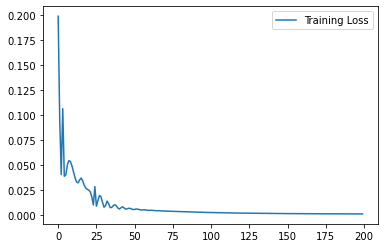

In [17]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [18]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 154.54 RMSE
Test Score: 123.20 RMSE


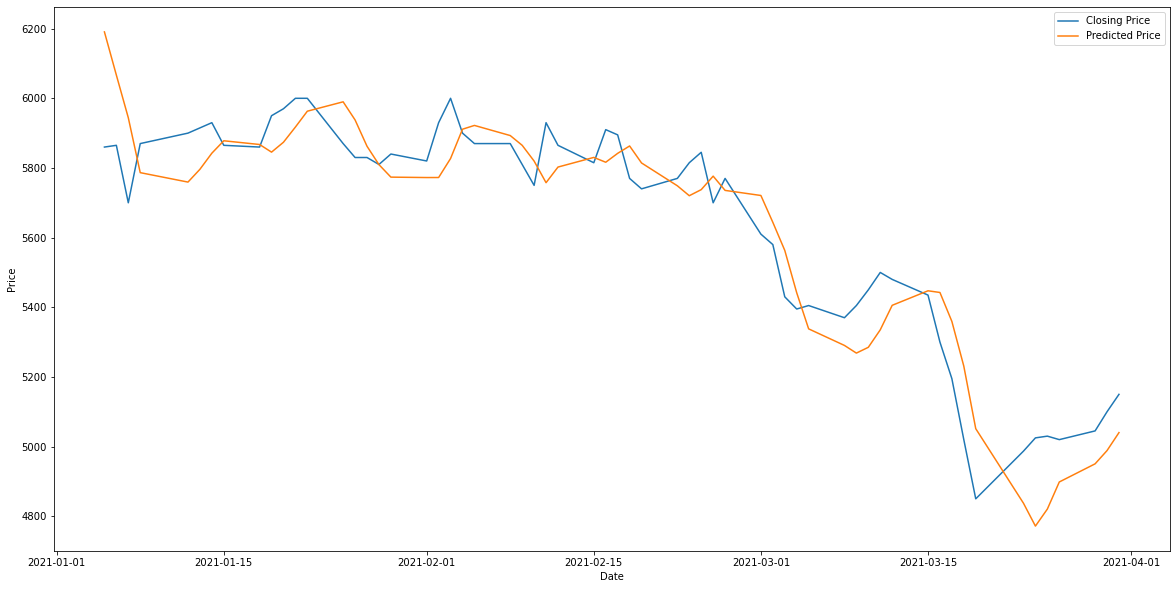

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions look very accurate, but with the price of the stock falling for most of 2021 it seems unlikely to make a profit with this stock.

In [20]:
boll_daily = CCB[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 15)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 15)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_1264/785973294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_1264/785973294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_1264/785973294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,7120.000000,NaN,NaN,NaN
1,2020-01-03,7000.000000,NaN,NaN,NaN
2,2020-01-07,6950.000000,NaN,NaN,NaN
3,2020-01-08,6880.000000,NaN,NaN,NaN
4,2020-01-09,6810.000000,NaN,NaN,NaN
...,...,...,...,...,...
298,2021-03-25,4820.641602,5221.717090,5693.282051,4750.152129
299,2021-03-26,4898.380371,5185.494303,5667.979045,4703.009562
300,2021-03-29,4950.501465,5159.660547,5648.601343,4670.719750
301,2021-03-30,4988.542480,5139.533724,5630.253717,4648.813731


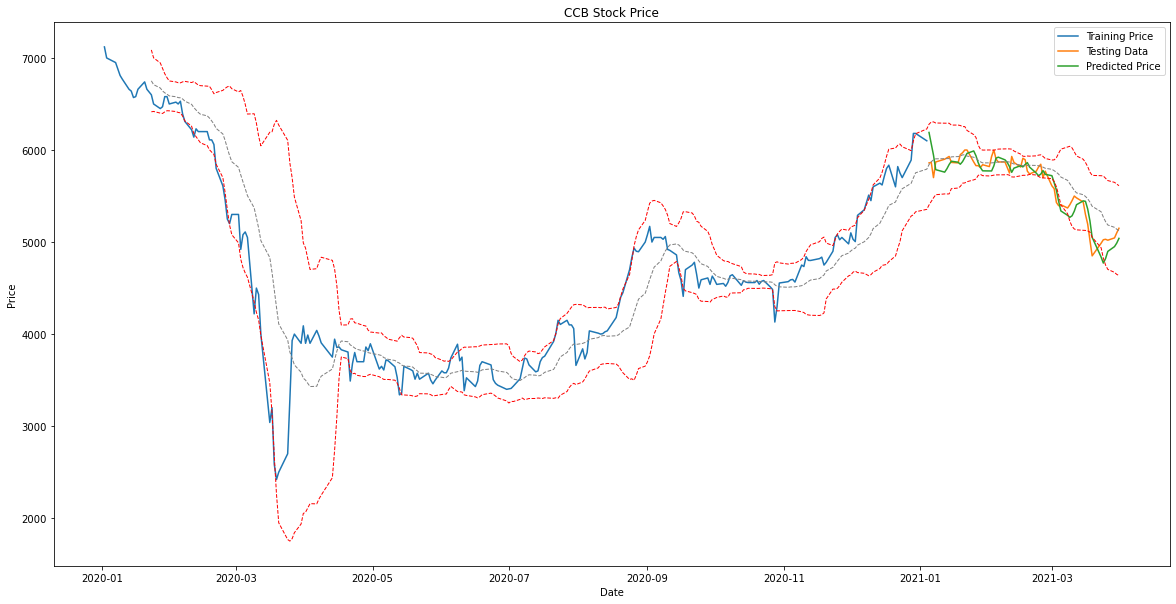

In [21]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('CCB Stock Price')
plt.legend()
plt.show()

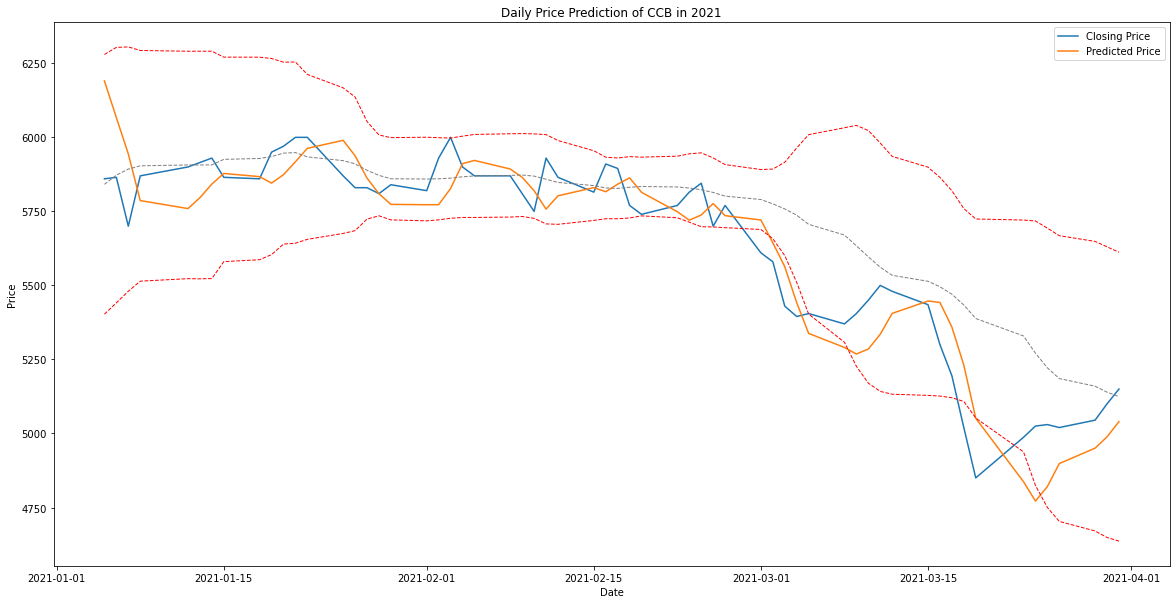

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][243:], boll_daily['upper_bb'][243:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][243:], boll_daily['lower_bb'][243:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][243:], boll_daily['SMA'][243:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of CCB in 2021')
plt.legend()
plt.show()

The investment strategy with bollinger bands is to buy when price hits the lower band and sell when price hits the upper band. As predicted, there are no selling indicators with the bollinger bands but there are a couple buying indicators.

In [31]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/2526091140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
242,2021-01-04,6100.000000,5792.000000,6228.803323,5355.196677,NaN
243,2021-01-05,6253.828125,5845.588542,6299.471862,5391.705221,5860.0
244,2021-01-06,6012.796387,5873.108301,6313.017355,5433.199247,5865.0
245,2021-01-07,5833.097168,5885.981445,6307.575549,5464.387342,5700.0
246,2021-01-08,5667.972168,5889.179590,6302.778447,5475.580733,5870.0
...,...,...,...,...,...,...
298,2021-03-25,4920.672363,5246.253548,5730.265008,4762.242089,5030.0
299,2021-03-26,5008.017578,5218.562760,5706.654070,4730.471451,5020.0
300,2021-03-29,5032.360352,5198.426693,5690.938267,4705.915119,5045.0
301,2021-03-30,5037.118652,5179.395898,5673.405820,4685.385977,5100.0


In [32]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
282,2021-03-02,5641.689453,5795.053353,5941.128628,5648.978077,5580.0
283,2021-03-03,5552.495117,5778.154525,5970.221891,5586.087159,5430.0
284,2021-03-04,5423.379395,5756.939779,6022.534947,5491.344611,5395.0
285,2021-03-05,5334.401367,5723.827832,6063.360542,5384.295122,5405.0
295,2021-03-19,5000.229004,5405.865658,5763.679028,5048.052288,4850.0
296,2021-03-23,4807.819336,5343.590983,5769.417308,4917.764658,4987.0
297,2021-03-24,4813.450684,5288.375065,5760.785989,4815.964141,5025.0


In [33]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


The only investment strategy is to buy the stock at one of the buying indicators. I will use the indicator when the predicted price is lowest on 03-23-2021 with a closing price of \\$4987. There is no loss or profit for this stock.

## Weekly

In [121]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [122]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 13)
X_test_w, y_test_w = get_weekly_test_data(CCB, testing_data, scaler, 13)

In [123]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [124]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.20727844536304474
Epoch  1 MSE:  0.12699156999588013
Epoch  2 MSE:  0.05144641548395157
Epoch  3 MSE:  0.22478333115577698
Epoch  4 MSE:  0.03704649955034256
Epoch  5 MSE:  0.052367378026247025
Epoch  6 MSE:  0.07454388588666916
Epoch  7 MSE:  0.08173558861017227
Epoch  8 MSE:  0.07935673743486404
Epoch  9 MSE:  0.07171217352151871
Epoch  10 MSE:  0.06146848946809769
Epoch  11 MSE:  0.05077052488923073
Epoch  12 MSE:  0.04211454093456268
Epoch  13 MSE:  0.03864379972219467
Epoch  14 MSE:  0.04153269901871681
Epoch  15 MSE:  0.04434474930167198
Epoch  16 MSE:  0.042633820325136185
Epoch  17 MSE:  0.03891454264521599
Epoch  18 MSE:  0.03623250126838684
Epoch  19 MSE:  0.03531351685523987
Epoch  20 MSE:  0.03549608215689659
Epoch  21 MSE:  0.03591963276267052
Epoch  22 MSE:  0.03597293421626091
Epoch  23 MSE:  0.03532939404249191
Epoch  24 MSE:  0.03387149050831795
Epoch  25 MSE:  0.031619563698768616
Epoch  26 MSE:  0.028720583766698837
Epoch  27 MSE:  0.0256236195564270

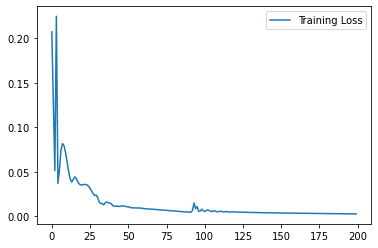

In [125]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [126]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4617.96 RMSE
Test Score: 5743.33 RMSE


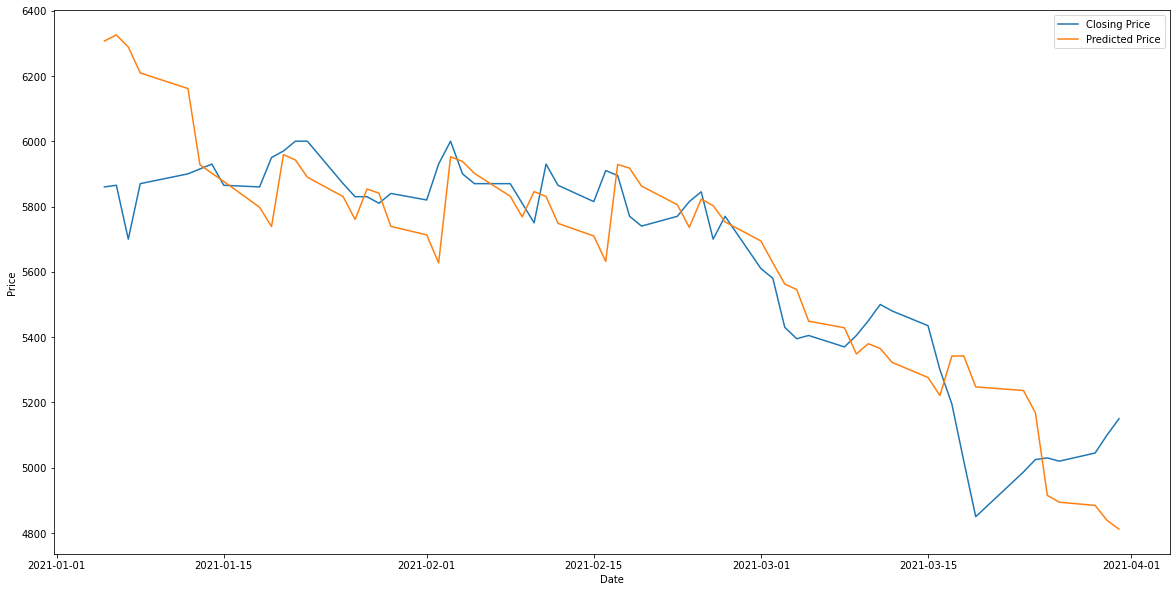

In [127]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly price predictions are also pretty accurate, but like the daily price predictions there will probably be no selling indicators.

In [128]:
boll_weekly = CCB[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 20)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 20)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/3897622266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/3897622266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/3897622266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,7120.000000,NaN,NaN,NaN
1,2020-01-03,7000.000000,NaN,NaN,NaN
2,2020-01-07,6950.000000,NaN,NaN,NaN
3,2020-01-08,6880.000000,NaN,NaN,NaN
4,2020-01-09,6810.000000,NaN,NaN,NaN
...,...,...,...,...,...
298,2021-03-25,4915.288574,5401.377954,5831.548237,4971.207671
299,2021-03-26,4894.326660,5355.955225,5799.311483,4912.598966
300,2021-03-29,4884.497070,5312.542090,5762.292338,4862.791842
301,2021-03-30,4838.789551,5269.758447,5729.226595,4810.290299


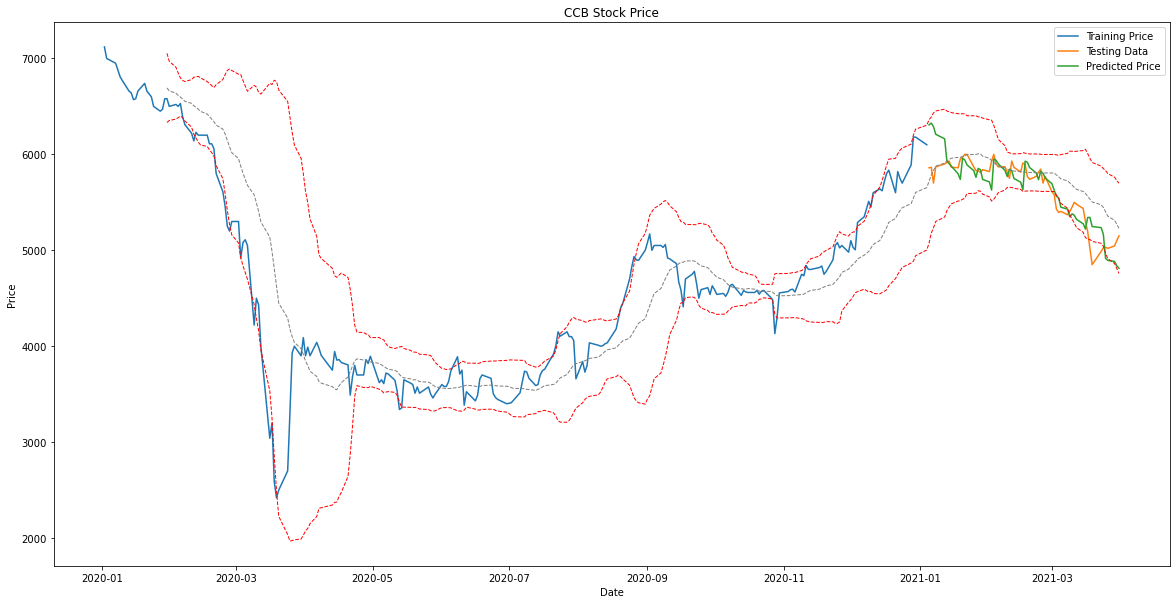

In [129]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('CCB Stock Price')
plt.legend()
plt.show()

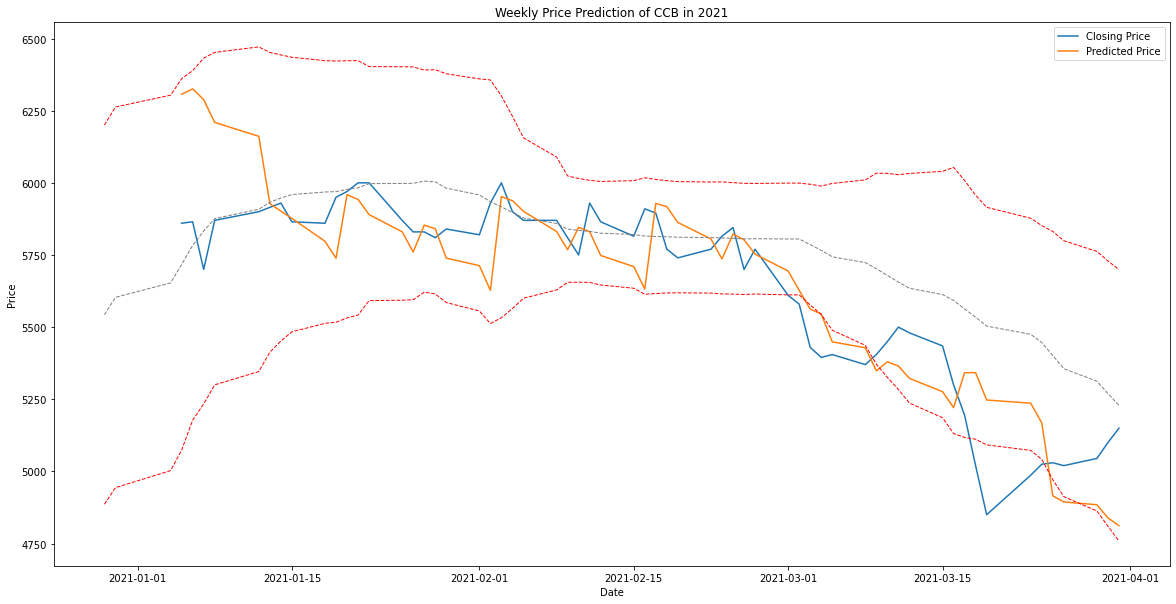

In [130]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][243:], boll_weekly['upper_bb'][243:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][243:], boll_weekly['lower_bb'][243:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][243:], boll_weekly['SMA'][243:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of CCB in 2021')
plt.legend()
plt.show()

Just like with the daily predictions, it looks like there are only buying indicators that we can use and no selling indicators.

In [131]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/1562068346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
242,2021-01-04,6100.000000,5653.250000,6303.701463,5002.798537,NaN
243,2021-01-05,6306.839355,5717.091968,6360.583479,5073.600456,5860.0
244,2021-01-06,6325.547852,5783.119360,6388.852940,5177.385780,5865.0
245,2021-01-07,6288.390625,5833.038892,6432.184022,5233.893762,5700.0
246,2021-01-08,6209.168457,5875.997314,6452.076452,5299.918177,5870.0
...,...,...,...,...,...,...
298,2021-03-25,4915.288574,5401.377954,5831.548237,4971.207671,5030.0
299,2021-03-26,4894.326660,5355.955225,5799.311483,4912.598966,5020.0
300,2021-03-29,4884.497070,5312.542090,5762.292338,4862.791842,5045.0
301,2021-03-30,4838.789551,5269.758447,5729.226595,4810.290299,5100.0


In [132]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
283,2021-03-03,5562.507324,5785.912036,5995.118490,5576.705582,5430.0
285,2021-03-05,5448.927246,5743.664136,5997.937011,5489.391261,5405.0
286,2021-03-08,5428.599121,5723.522925,6010.268996,5436.776854,5370.0
287,2021-03-09,5348.480957,5702.529688,6033.523023,5371.536352,5405.0
298,2021-03-25,4915.288574,5401.377954,5831.548237,4971.207671,5030.0
299,2021-03-26,4894.326660,5355.955225,5799.311483,4912.598966,5020.0


In [133]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


The buying indicator I will use is the one with the lowest predicted price on 03-26-2021 with a closing price of \\$5020. There is no profit or loss.

# Monthly

In [100]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [101]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 23)
X_test_m, y_test_m = get_monthly_test_data(CCB, testing_data, scaler, 23)

In [102]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [103]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.2482493668794632
Epoch  1 MSE:  0.18721632659435272
Epoch  2 MSE:  0.10725418478250504
Epoch  3 MSE:  0.0664968490600586
Epoch  4 MSE:  0.04073613882064819
Epoch  5 MSE:  0.03229856863617897
Epoch  6 MSE:  0.03576673939824104
Epoch  7 MSE:  0.03524627164006233
Epoch  8 MSE:  0.03546664118766785
Epoch  9 MSE:  0.03685739263892174
Epoch  10 MSE:  0.03558740019798279
Epoch  11 MSE:  0.03250797092914581
Epoch  12 MSE:  0.030497191473841667
Epoch  13 MSE:  0.029824644327163696
Epoch  14 MSE:  0.028955617919564247
Epoch  15 MSE:  0.027210630476474762
Epoch  16 MSE:  0.025633053854107857
Epoch  17 MSE:  0.025243965908885002
Epoch  18 MSE:  0.024325821548700333
Epoch  19 MSE:  0.0216476172208786
Epoch  20 MSE:  0.021059293299913406
Epoch  21 MSE:  0.022824233397841454
Epoch  22 MSE:  0.021539291366934776
Epoch  23 MSE:  0.019514158368110657
Epoch  24 MSE:  0.0191721860319376
Epoch  25 MSE:  0.01900503784418106
Epoch  26 MSE:  0.018775537610054016
Epoch  27 MSE:  0.018713204190

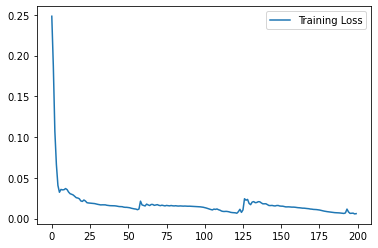

In [104]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [105]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4482.73 RMSE
Test Score: 5531.79 RMSE


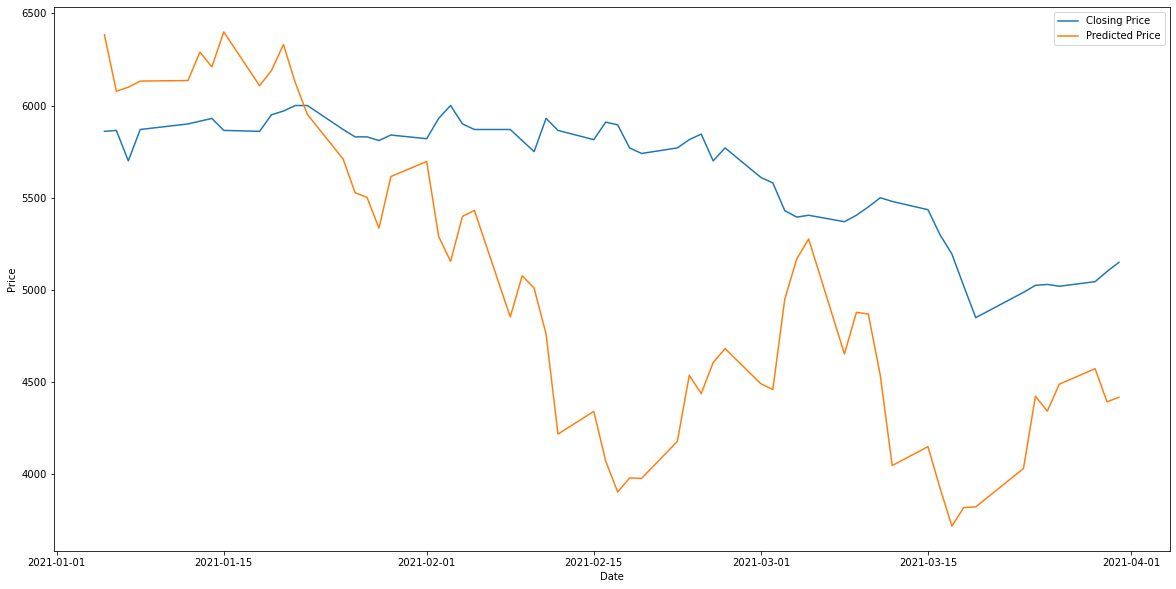

In [106]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly training data is very inaccurate and probably cannot be used to turn a profit. But let's see what investment strategy the bollinger bands show.

In [113]:
boll_monthly = CCB[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/405088392.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/405088392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/405088392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,7120.000000,NaN,NaN,NaN
1,2020-01-03,7000.000000,NaN,NaN,NaN
2,2020-01-07,6950.000000,NaN,NaN,NaN
3,2020-01-08,6880.000000,NaN,NaN,NaN
4,2020-01-09,6810.000000,NaN,NaN,NaN
...,...,...,...,...,...
298,2021-03-25,4342.960449,4442.994470,5356.945025,3529.043915
299,2021-03-26,4489.140137,4437.137610,5348.179090,3526.096130
300,2021-03-29,4573.034180,4431.678772,5337.832554,3525.524990
301,2021-03-30,4393.314941,4426.782629,5332.639569,3520.925690


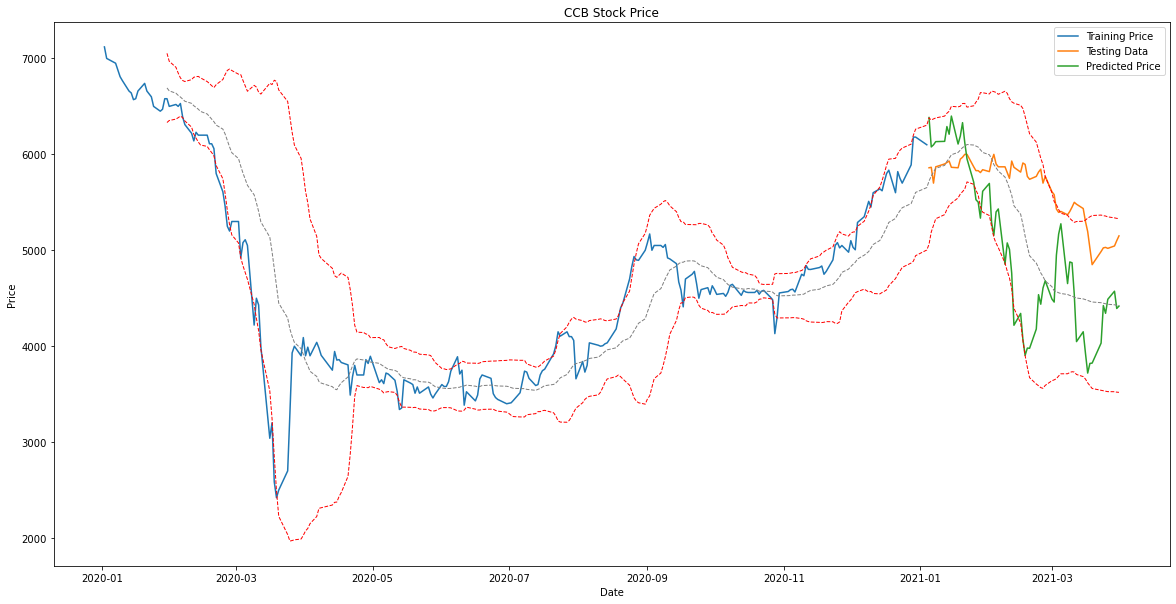

In [119]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('CCB Stock Price')
plt.legend()
plt.show()

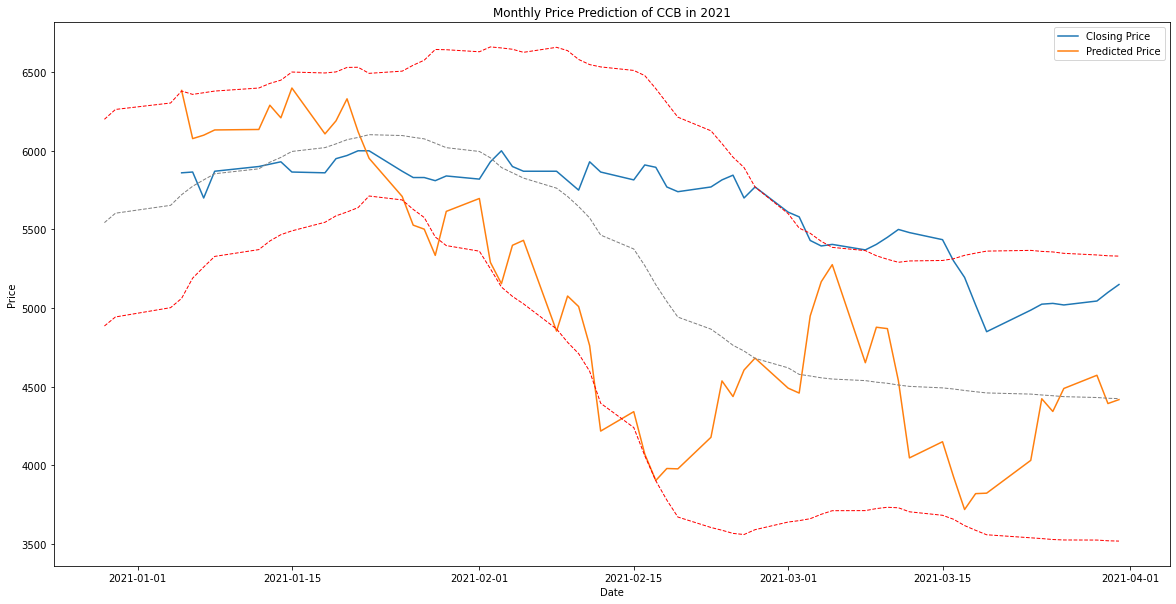

In [120]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][243:], boll_monthly['upper_bb'][243:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][243:], boll_monthly['lower_bb'][243:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][243:], boll_monthly['SMA'][243:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of CCB in 2021')
plt.legend()
plt.show()

In [116]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_5544/3844387549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
242,2021-01-04,6100.000000,5653.250000,6303.701463,5002.798537,NaN
243,2021-01-05,6383.566895,5720.928345,6379.951352,5061.905338,5860.0
244,2021-01-06,6077.405273,5774.548608,6358.545461,5190.551756,5865.0
245,2021-01-07,6099.142578,5815.005737,6369.003048,5261.008427,5700.0
246,2021-01-08,6132.461426,5854.128809,6379.640555,5328.617062,5870.0
...,...,...,...,...,...,...
298,2021-03-25,4342.960449,4442.994470,5356.945025,3529.043915,5030.0
299,2021-03-26,4489.140137,4437.137610,5348.179090,3526.096130,5020.0
300,2021-03-29,4573.034180,4431.678772,5337.832554,3525.524990,5045.0
301,2021-03-30,4393.314941,4426.782629,5332.639569,3520.925690,5100.0


In [117]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
257,2021-01-26,5527.364746,6085.790845,6544.012400,5627.569290,5830.0
258,2021-01-27,5501.831543,6075.882422,6575.893700,5575.871144,5830.0
259,2021-01-28,5335.042969,6048.134570,6643.987878,5452.281263,5810.0
266,2021-02-08,4853.577148,5762.548462,6657.742345,4867.354578,5870.0
270,2021-02-12,4218.255371,5464.177783,6533.183400,4395.172166,5865.0


In [118]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
243,2021-01-05,6383.566895,5720.928345,6379.951352,5061.905338,5860.0


Although there is one selling indicator for the monthly data, it is before any buying indicators so it is unusable. Just like the daily and weekly data, there are only buying indicators that we can use. The buying indicator I will use is on 02-12-2021 at a closing price of \\$5865. There is no profit or loss.

# Conclusion

With a stock price consistently falling for most of 2021, the only investment strategy I would recommend is to purchase the stock at one of the buying indicators given. The buying indicator using the daily price predictions had the lowest purchase price at \\$4987. There is no profit or loss using this investment strategy.